# 24.07.26 머신러닝 학습 13회차:과적합과 정규화

## 01 개념

### 과적합(Overfitting)

모델이 학습데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 말한다. 그런데 고정된 학습 데이터와 테스트 데이터로 평가를 수행하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 된다. 이러한 문제를 개선하기 위해 교차 검증을 이용해 다양한 학습과 평가를 수행할 수 있다.

### 다항식의 과(대)적합/과소적합 이해

1차 직선 > 2차 포물선 > 3차 곡선

![스크린샷 2024-07-30 182258.png](<attachment:스크린샷 2024-07-30 182258.png>)
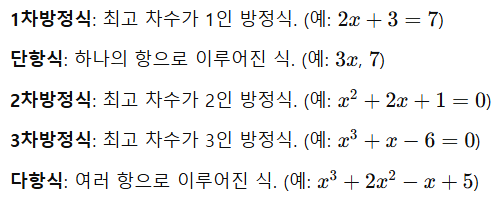

1. 한 가지 주의할 것은 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항회귀는 선형 회귀라는 점이다. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선행인지 비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.

2. 다항식의 차수(degree)가 높아질수록 복잡한 모델링이 가능하지만 학습 데이터에만 초점이 맞춰서 테스트 데이터 환경에서는 예측 정확도가 떨어지는 즉, 과적합의 문제가 크게 발생할 수 있다.

### 정규화(Normalization)

일반적으로 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다. 즉, 개별 데이터의 크기를 모두 똑같은 단위(최소0 ~ 최대1의 값)로 변경하는 것이다.

## 02 코드 실습

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 넘파이 ndarray로 반환된다. 변환이 필요하다.
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


In [22]:
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('feature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 03 기타

### 분산

데이터 포인트들이 평균에 비해 얼마나 떨어져 있는지 거리를 각각 재서 제곱을 하고 그 값들의 평균을 낸게 분산이다. 분산은 제곱 단위로 나타내기에 원 데이터의 단위와 다를 수 있다.

### 표준편차

표준편차를 분산의 제곱근으로, 원래 데이터와 같은 단위를 가진다. 때문에 표준편차는 분산보다 해석이 더 직관적이다. 표준편차가 작으면 데이터가 평균에 가깝게 모여 있다는 것을 의미한다. 표준편차는 데이터의 변동성을 정량적으로 나타내기 때문에 다양한 분야에서 널리 사용된다.

### 공통점

이렇듯 분산과 표준편차 둘은 데이터의 변동성을 측정하는 두 가지 지표이다. 둘 다 데이터가 평균으로부터 얼마나 퍼져 있는지를 나타내지만, 사용 방식과 해석에 약간의 차이가 있을 뿐이다.